In [2]:
import warnings; warnings.simplefilter('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import umap
import pickle

sns.set(style="ticks", color_codes=True)
random_state = 12

In [3]:
url1 = 'https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CaseStudy-02/eskrim_PreProcessed.csv'
url2 = 'https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CaseStudy-02/eskrim_PreProcessed_encode.csv'

df_biasa = pd.read_csv(url1)
df_encode = pd.read_csv(url2)

In [4]:
df_biasa.sample(5)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
19,Pria,18,13524590,59,0,Jakarta,1,Selasa,4
130,Wanita,50,21311475,57,1,Jakarta,1,Sabtu,1
68,Pria,48,15983606,46,1,Jakarta,2,Minggu,0
53,Pria,48,19672131,48,1,Jakarta,2,Minggu,3
143,Pria,35,31967213,90,1,Depok,0,Selasa,0


In [5]:
df_encode = df_encode.rename(columns={"Pendapatan-per-bulan": "PPB"})
df_encode['Kelamin encode'] = df_encode["Kelamin encode"].astype(int)
df_encode = df_encode[['Umur', 'PPB', 'skor-pengeluaran', 'Kelamin encode', 'Menikah', 'Promo', 'FavFlavor', 'kota encode', 'HariFav encode']]

In [6]:
df_encode.sample(4)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
6,27,21311475,56,0,1,1,5,0,1
98,42,20491803,43,1,1,2,4,0,6
159,27,12704918,51,1,1,1,4,0,1
49,49,20491803,59,1,1,1,6,0,6


In [7]:
numerik = ['Umur', 'PPB', 'skor-pengeluaran']
kategorik = ['Kelamin encode', 'Menikah', 'Promo', 'FavFlavor', 'kota encode', 'HariFav encode']


In [8]:
df_encode.describe(include='all')

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
count,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,37.631016,1.891945e+07,50.502674,0.550802,0.850267,1.652406,3.577540,0.866310,2.491979
std,11.905890,1.067615e+07,26.167035,0.498748,0.357767,0.945864,2.731365,0.847697,2.363179
min,18.000000,4.098360e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.147541e+07,34.500000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,36.000000,1.926230e+07,50.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
75%,48.000000,2.581967e+07,73.000000,1.000000,1.000000,3.000000,6.000000,2.000000,6.000000
max,60.000000,5.000000e+07,101.000000,1.000000,1.000000,3.000000,8.000000,2.000000,6.000000


In [9]:
for kolom in kategorik:
    a = df_encode[kolom].unique()
    print(f'kolom: {kolom}\nuniq: {sorted(a)}')
    for unik in sorted(a):
        print(f'{unik}: {df_encode[df_encode[kolom] == unik][kolom].count()}')
    print('\n')

kolom: Kelamin encode
uniq: [0, 1]
0: 84
1: 103


kolom: Menikah
uniq: [0, 1]
0: 28
1: 159


kolom: Promo
uniq: [0, 1, 2, 3]
0: 14
1: 85
2: 40
3: 48


kolom: FavFlavor
uniq: [0, 1, 2, 3, 4, 5, 6, 7, 8]
0: 37
1: 20
2: 18
3: 19
4: 20
5: 19
6: 16
7: 19
8: 19


kolom: kota encode
uniq: [0, 1, 2]
0: 81
1: 50
2: 56


kolom: HariFav encode
uniq: [0, 1, 2, 3, 4, 5, 6]
0: 37
1: 64
2: 21
3: 5
4: 6
5: 3
6: 51




In [10]:
#df_model = StandardScaler().fit_transform(df_encode[numerik])
df_model = pd.DataFrame(data=StandardScaler().fit_transform(df_encode[numerik]), index=df_encode.index, columns=numerik)

In [11]:
df_model.head()

,Umur,PPB,skor-pengeluaran
0,0.957468,-0.545167,0.057375
1,-0.474230,1.379386,1.360208
2,1.125903,-0.275729,-0.364129
3,-1.569058,-0.583658,0.172331
4,0.031075,0.109181,-0.325811


In [12]:
for kolom in kategorik:
    df_model[kolom] = df_encode[kolom]

In [13]:
df_model.sample(7)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
107,-1.232188,-0.275729,0.057375,1,0,1,7,0,1
73,0.031075,1.995243,1.551802,1,1,0,0,2,0
26,-1.484841,-0.930077,0.938704,1,0,1,4,2,1
137,0.789033,-0.468185,-0.325811,1,1,2,0,0,0
71,0.620598,2.495627,-0.862271,1,1,3,6,1,0
47,0.957468,0.032199,0.210650,0,1,1,6,0,6
75,-0.221578,-1.276497,0.402243,0,1,1,4,0,2


In [14]:
df_modelNum = df_model.drop(['FavFlavor', 'kota encode', 'HariFav encode'], axis=1)

In [15]:
df_model.describe(include='all').round(0)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
count,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0
mean,-0.0,-0.0,0.0,1.0,1.0,2.0,4.0,1.0,2.0
std,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,2.0
min,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,0.0,1.0
50%,-0.0,0.0,-0.0,1.0,1.0,1.0,3.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,3.0,6.0,2.0,6.0
max,2.0,3.0,2.0,1.0,1.0,3.0,8.0,2.0,6.0


In [16]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Umur              187 non-null    float64
 1   PPB               187 non-null    float64
 2   skor-pengeluaran  187 non-null    float64
 3   Kelamin encode    187 non-null    int32  
 4   Menikah           187 non-null    int64  
 5   Promo             187 non-null    int64  
 6   FavFlavor         187 non-null    int64  
 7   kota encode       187 non-null    int64  
 8   HariFav encode    187 non-null    int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 12.5 KB


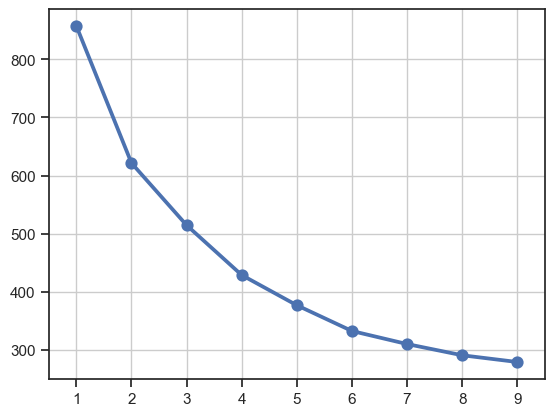

In [17]:
cost = {}
for k in range(1,10):
    kproto = KPrototypes(n_clusters = k, random_state = random_state)
    kproto.fit_predict(df_model, categorical = [3,4,5,6,7,8])
    cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [18]:
C_KProto = KPrototypes(n_clusters = 4, random_state = random_state)
C_KProto = C_KProto.fit(df_model, categorical = [3,4,5,6,7,8])

In [19]:
# Menentukan segmen tiap pelanggan
C_KProto = C_KProto.predict(df_model, categorical = [3,4,5,6,7,8])
print('Segmen Pelanggan: {}\n'.format(C_KProto))

# Menggabungkan data awal dan segmen pelanggan
df_final = df_biasa.copy()
df_final['C_KProto'] = C_KProto
df_final.head(4)

Segmen Pelanggan: [3 2 3 0 3 2 0 0 0 0 2 1 3 3 3 1 2 3 0 0 3 1 2 0 3 3 0 2 0 2 2 3 0 1 0 2 3
 0 3 0 2 1 2 3 0 3 0 3 0 3 1 3 3 3 3 1 3 0 3 3 3 3 2 3 0 2 3 3 3 1 0 1 3 2
 2 0 2 3 2 1 3 3 3 0 3 2 1 1 3 1 1 3 3 3 0 3 1 1 3 3 0 0 0 0 0 0 2 0 3 3 1
 3 2 3 3 1 1 1 0 2 3 1 3 0 1 0 1 2 0 0 3 2 0 1 1 2 0 3 0 3 1 1 0 2 0 3 2 2
 3 2 0 2 3 2 3 2 2 0 2 0 1 3 0 2 1 1 0 0 2 1 2 1 0 1 3 0 3 3 1 0 2 3 0 3 2
 0 3]



,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_KProto
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,3
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,2
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,0


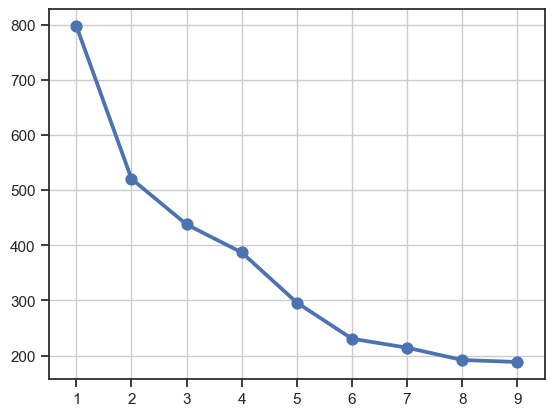

In [20]:
inertia = {}
for k in range(1,10):
    kmens = KMeans(n_clusters = k, random_state = random_state)
    kmens.fit(df_modelNum)
    inertia[k] = kmens.inertia_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
plt.grid()
plt.show()

array([1, 3, 1, 2, 1, 3, 2, 0, 2, 2])

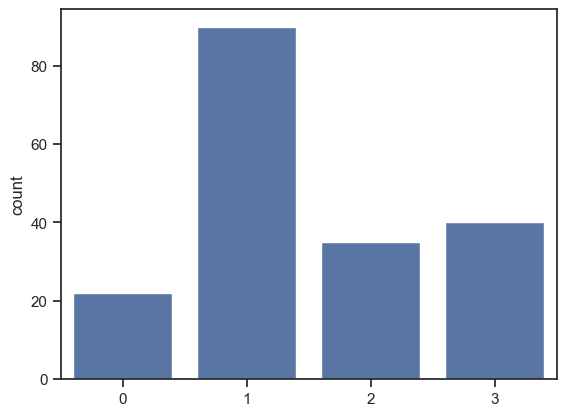

In [21]:
kmPP = cluster.KMeans(n_clusters=4, init='k-means++', random_state=random_state)
kmPP.fit(df_modelNum)
C_kmpp = kmPP.predict(df_modelNum)
sns.countplot(x=C_kmpp)
df_final['C_KMpp'] = C_kmpp
C_kmpp[:10]

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_model, C_KProto)
print(f"Silhouette Score: {silhouette_avg}")

In [22]:
import gower
from sklearn.cluster import AgglomerativeClustering

# Misal df adalah dataframe Anda, meskipun kategori berupa angka, Gower dapat mengenalinya sebagai kategori
distance_matrix = gower.gower_matrix(df_modelNum)

# Clustering dengan Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
C_Hier = model.fit_predict(distance_matrix)
C_Hier

df_final['C_Hier'] = C_Hier

In [23]:
df_final.sample(6)

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,C_KProto,C_KMpp,C_Hier
45,Wanita,40,18442622,40,1,Jakarta,2,Rabu,8,3,1,2
78,Wanita,31,27049180,93,0,Depok,0,Selasa,0,2,3,3
16,Wanita,32,25000000,87,1,Depok,1,Kamis,8,2,3,2
164,Pria,43,25819672,17,1,Tangerang,3,Senin,5,1,1,0
132,Pria,25,3688524,73,1,Depok,1,Senin,6,0,0,0
163,Wanita,36,36065573,85,1,Depok,1,Senin,4,2,3,2


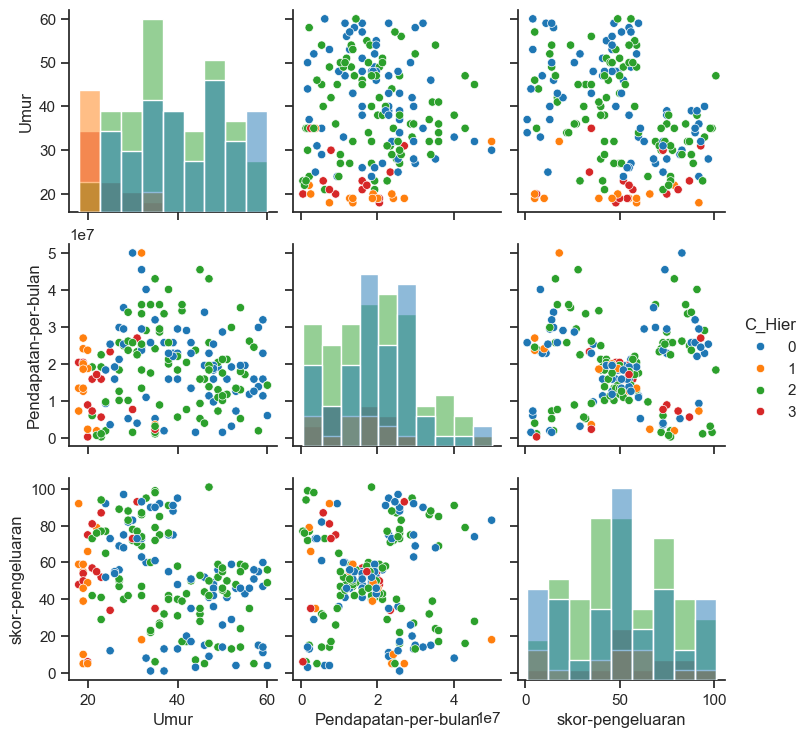

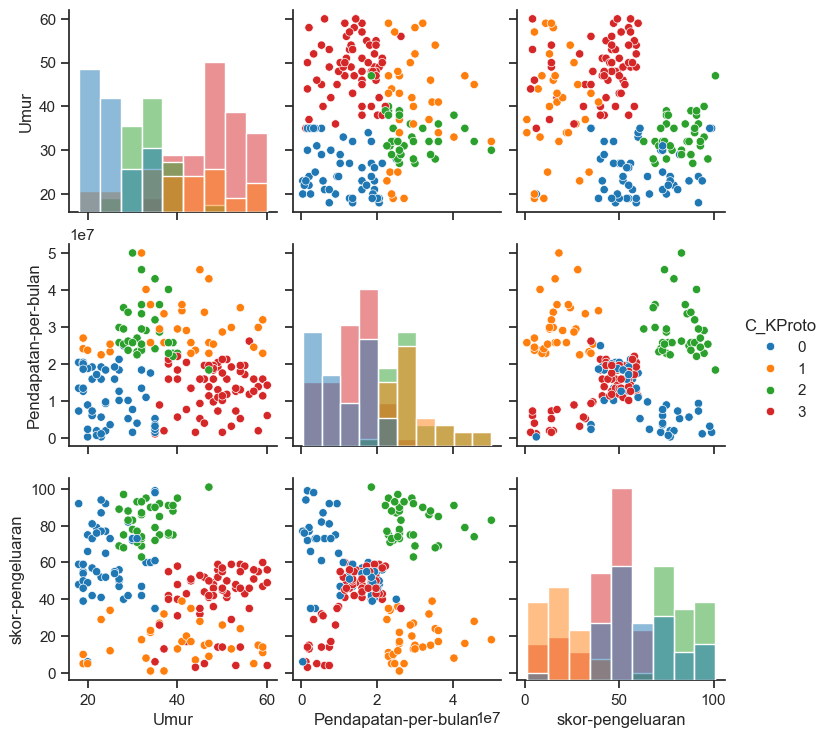

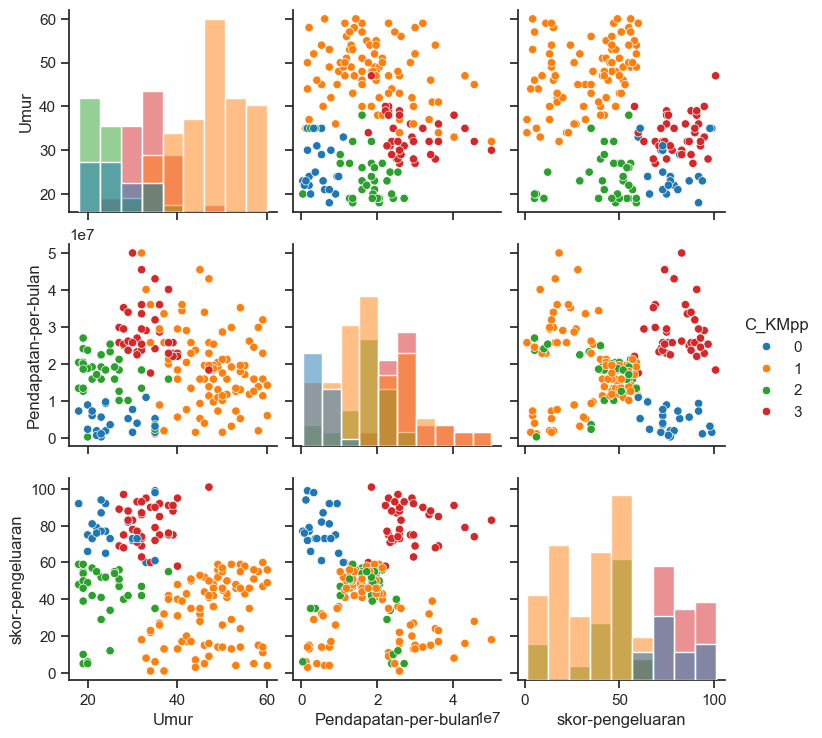

In [24]:

pairplot_Hier = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_Hier']], hue="C_Hier", diag_kind="hist", palette="tab10")
pairplot_Proto = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_KProto']], hue="C_KProto", diag_kind="hist", palette="tab10")
pairplot_KMpp = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'C_KMpp']], hue="C_KMpp", diag_kind="hist", palette="tab10")


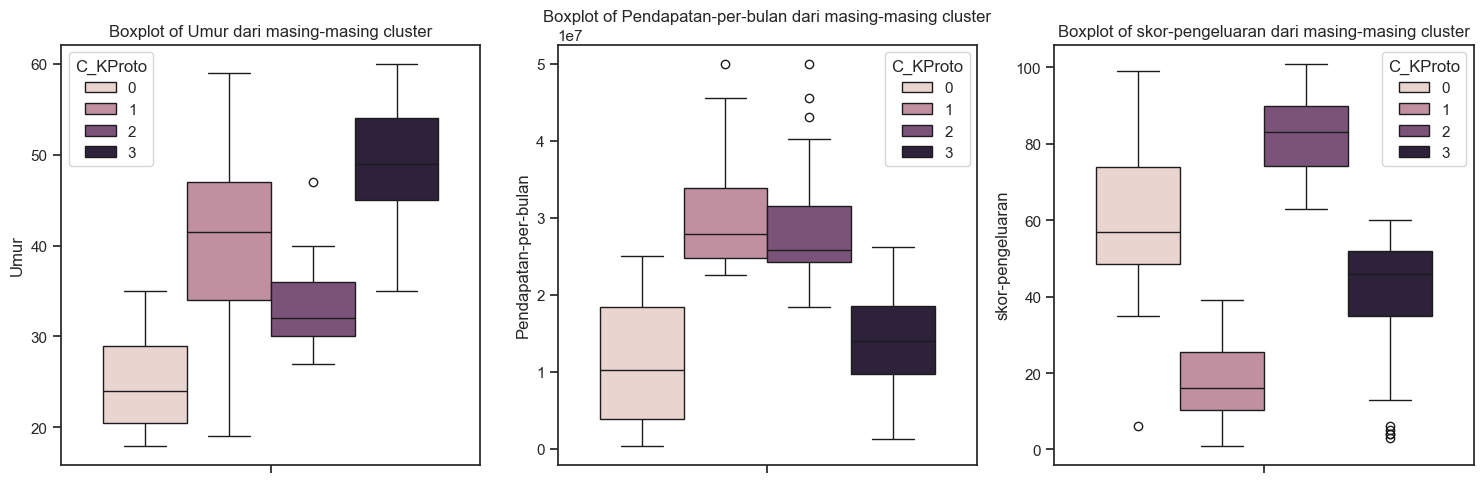

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_KProto')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')
    
plt.tight_layout()
plt.show()

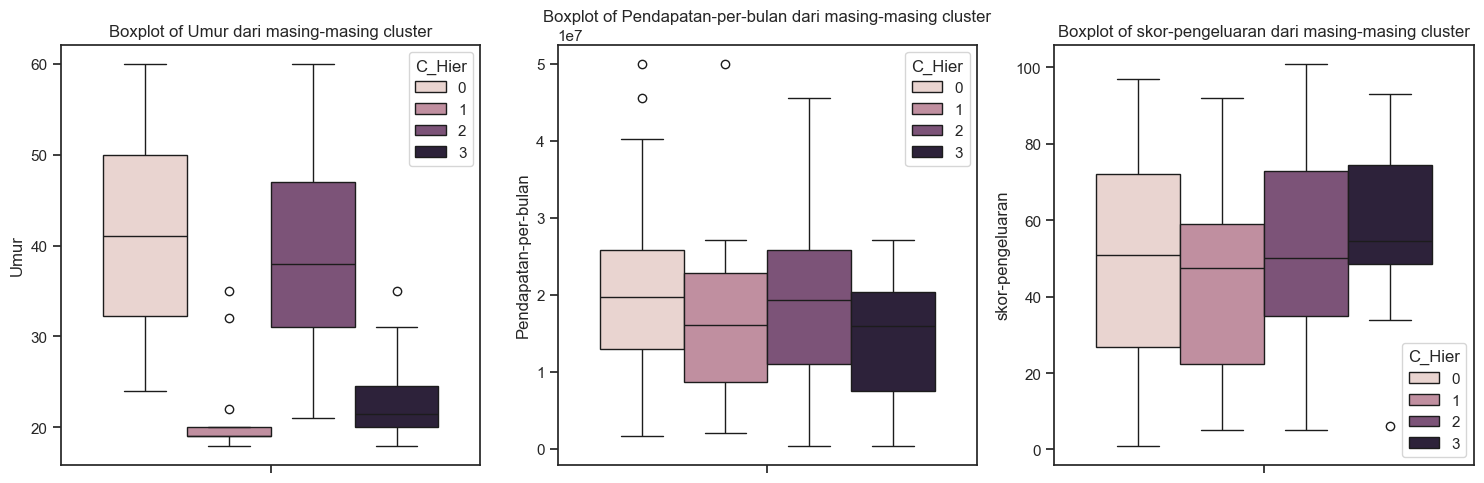

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_Hier')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')
    
plt.tight_layout()
plt.show()

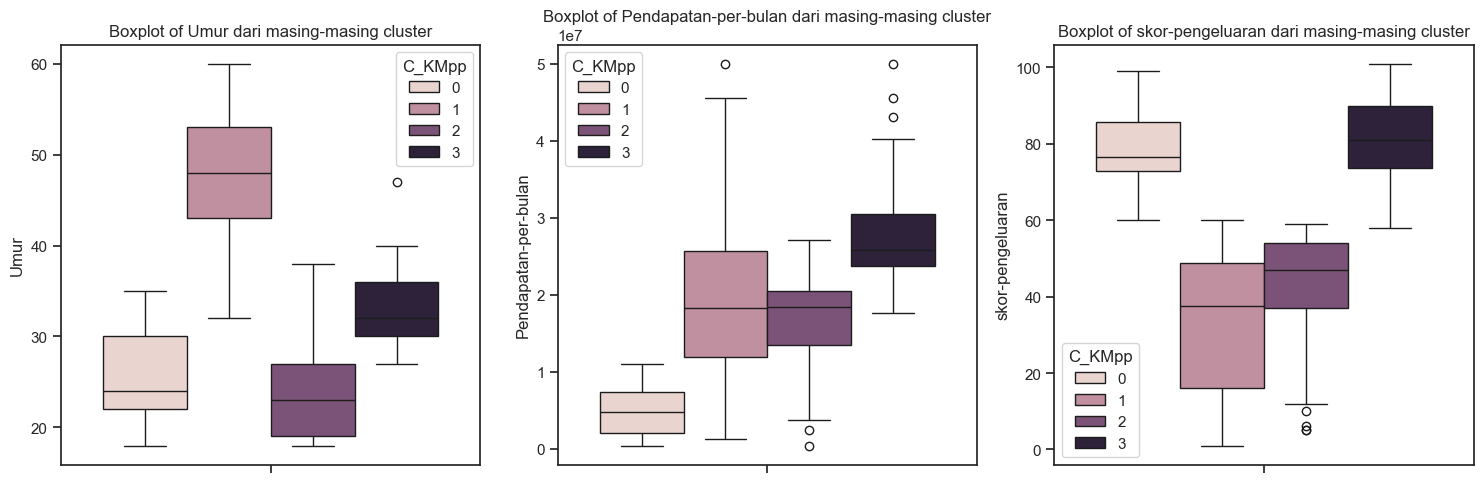

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']):
    sns.boxplot(data=df_final, y=column, ax=ax[i], hue='C_KMpp')
    ax[i].set_title(f'Boxplot of {column} dari masing-masing cluster')
    
plt.tight_layout()
plt.show()

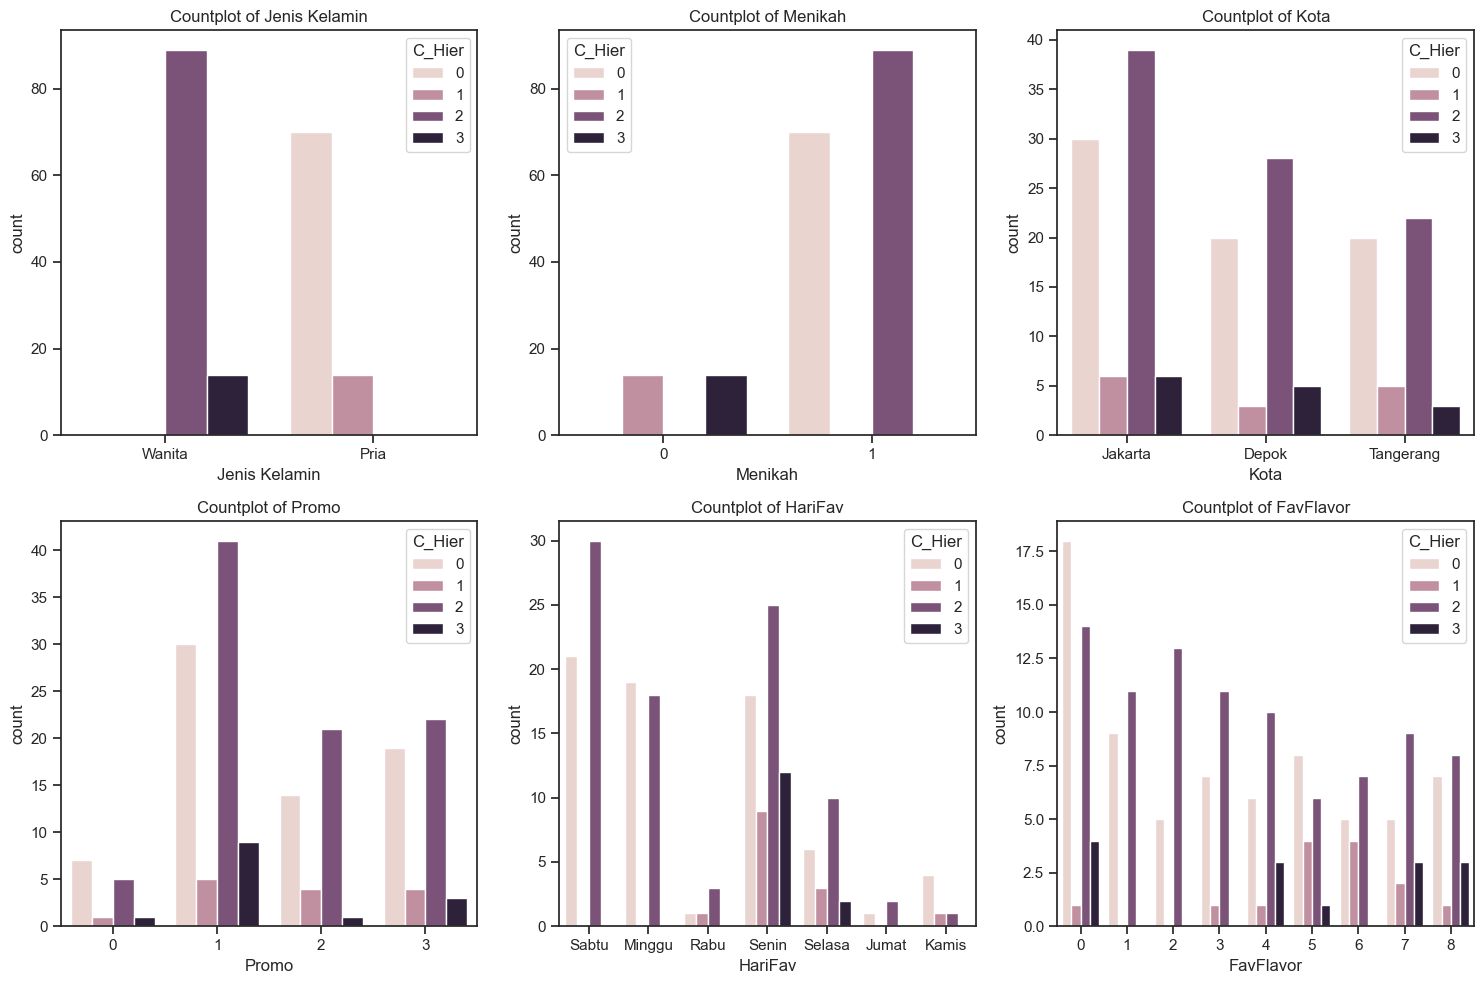

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_Hier')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


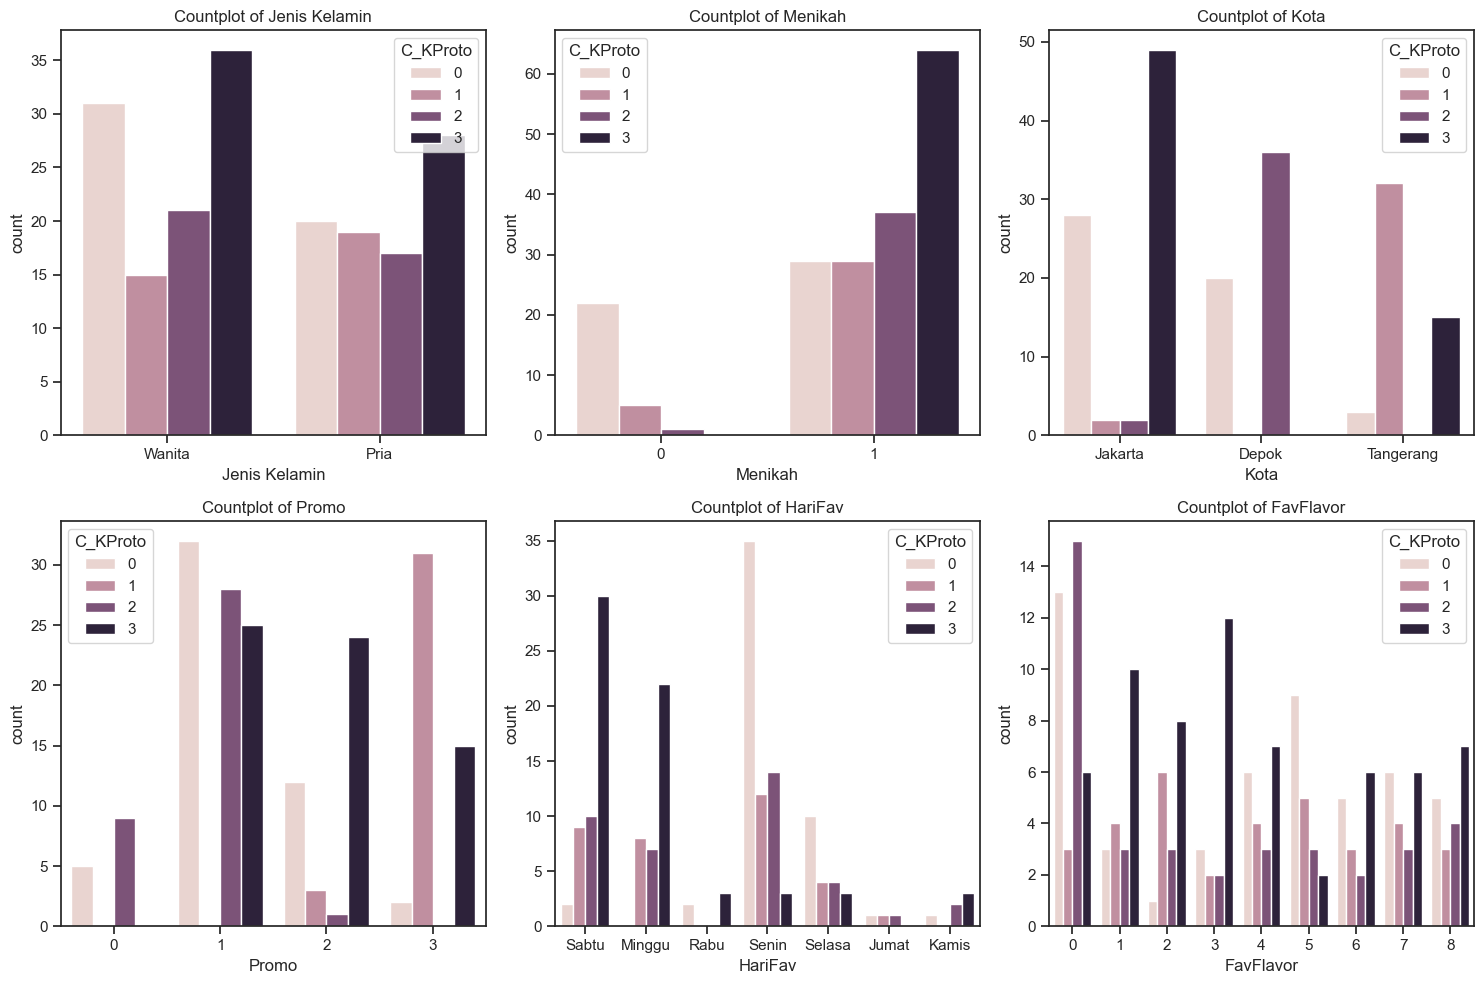

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_KProto')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


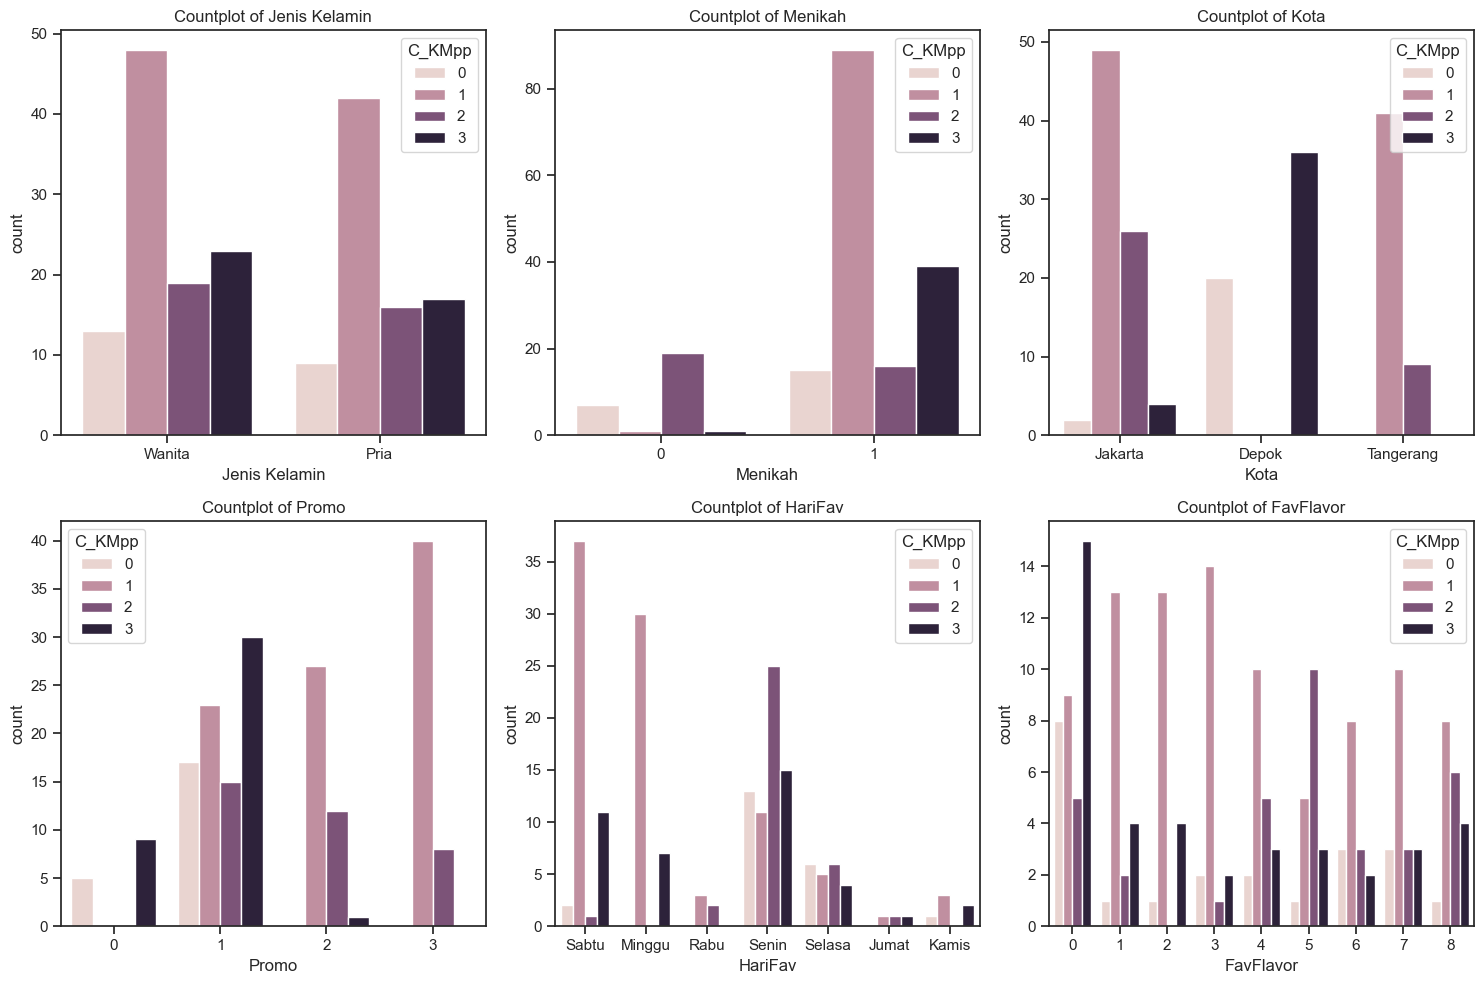

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_final, x=column, ax=ax[i], hue='C_KMpp')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()


In [31]:
df_model.sample(2)

,Umur,PPB,skor-pengeluaran,Kelamin encode,Menikah,Promo,FavFlavor,kota encode,HariFav encode
124,-1.484841,0.455601,-1.743600,0,0,3,6,1,1
126,0.452163,0.378619,-0.594041,0,1,2,7,1,2
